Goals ⛪

predicting aparment price in Mexico city depaned on four features



     ['surface_covered_in_m2', 'lat', 'lon', 'borough']


---


Algorithms Used

    Linear Regression
    Ridge


# **`Tasks`**
1. Subset the data in the CSV file and return only apartments in Mexico City (`"Distrito Federal"`) that cost less than \$100,000.
2. Remove outliers by trimming the bottom and top 10\% of properties in terms of `"surface_covered_in_m2"`.
3. Create separate `"lat"` and `"lon"` columns.
4. Mexico City is divided into [15 boroughs](https://en.wikipedia.org/wiki/Boroughs_of_Mexico_City). Create a `"borough"` feature from the `"place_with_parent_names"` column.
5. Drop columns that are more than 50\% null values.
6. Drop columns containing low- or high-cardinality categorical values. 
7. Drop any columns that would constitute leakage for the target `"price_aprox_usd"`.





> **1-Import libraries**



In [55]:
!pip install category_encoders
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.9 MB/s eta 0:00:00


In [56]:
#Read data libraries
import pandas as pd
import numpy as np
#Data Visulalization libraries 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing libraries
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# split data library
from sklearn.model_selection import train_test_split
# model libraries

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline




> **2-Read data**



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/mexico house/mexico-city-real-estate-1.csv")
df.head()

,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,1,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,2,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,3,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,4,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,5,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4628 non-null   int64  
 1   operation                   4628 non-null   object 
 2   property_type               4628 non-null   object 
 3   place_with_parent_names     4628 non-null   object 
 4   lat-lon                     4144 non-null   object 
 5   price                       4538 non-null   float64
 6   currency                    4538 non-null   object 
 7   price_aprox_local_currency  4538 non-null   float64
 8   price_aprox_usd             4538 non-null   float64
 9   surface_total_in_m2         1668 non-null   float64
 10  surface_covered_in_m2       4436 non-null   float64
 11  price_usd_per_m2            1150 non-null   float64
 12  price_per_m2                4249 non-null   float64
 13  floor                       291 n



> **3-Data Preparation**



In [6]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [7]:
df["place_with_parent_names"].head(10)

0       |Miguel Hidalgo|Distrito Federal|México|
1           |Iztapalapa|Distrito Federal|México|
2              |Tlalpan|Distrito Federal|México|
3       |Miguel Hidalgo|Distrito Federal|México|
4            |Benito Juárez|Quintana Roo|México|
5       |Miguel Hidalgo|Distrito Federal|México|
6        |Benito Juárez|Distrito Federal|México|
7       |Álvaro Obregón|Distrito Federal|México|
8    |Gustavo A. Madero|Distrito Federal|México|
9            |Benito Juárez|Quintana Roo|México|
Name: place_with_parent_names, dtype: object

In [8]:
#Subset the data in the CSV file and return only apartments in Mexico City ("Distrito Federal") that cost less than $100,000.
mask_apt = df["place_with_parent_names"].str.contains("Distrito Federal")
mask_price = df['price_aprox_usd'] < 100000
mask_prt = df['property_type'] == "apartment"
df = df[mask_apt & mask_price & mask_prt]
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.67000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
11,sell,apartment,|Benito Juárez|Distrito Federal|México|,"23.634501,-102.552788",1784569.0,MXN,1768425.20,94022.66,NaN,57.0,NaN,31308.22807,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/pdji_ven...
14,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.36269,-99.150565",1260000.0,MXN,1248601.52,66384.96,NaN,103.0,NaN,12233.00971,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/onph_ven...
20,sell,apartment,|Iztacalco|Distrito Federal|México|,"19.4024128,-99.0953907",1345000.0,MXN,1333148.73,70880.12,56.0,56.0,1265.716429,24017.85714,NaN,NaN,NaN,http://iztacalco.properati.com.mx/r6gm_venta_d...
21,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.35782,-99.149406",1295000.0,MXN,1283284.95,68228.99,NaN,80.0,NaN,16187.50000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/qvop_ven...


Text(0.5, 1.0, 'Distribution of Apartment Prices')

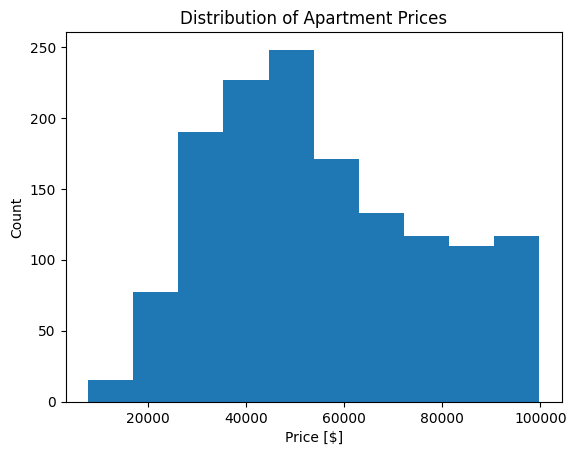

In [15]:
plt.hist(df["price_aprox_usd"])
# Label axes
plt.xlabel("Price [$]")
plt.ylabel("Count")
# Add title
plt.title("Distribution of Apartment Prices")

In [16]:
#Remove outliers by trimming the bottom and top 10% of properties in terms of "surface_covered_in_m2".
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df["surface_covered_in_m2"].between(low, high)
df = df[mask_area]

In [17]:
#Create separate "lat" and "lon" columns
# Split "lat-lon" into 2 separate features "lat" and "lon"
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand = True).astype(float)
df.drop(columns = ["lat-lon"], inplace = True)
df.head()


,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
11,sell,apartment,|Benito Juárez|Distrito Federal|México|,1784569.0,MXN,1768425.20,94022.66,NaN,57.0,NaN,31308.228070,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/pdji_ven...,23.634501,-102.552788
20,sell,apartment,|Iztacalco|Distrito Federal|México|,1345000.0,MXN,1333148.73,70880.12,56.0,56.0,1265.716429,24017.857140,NaN,NaN,NaN,http://iztacalco.properati.com.mx/r6gm_venta_d...,19.402413,-99.095391
21,sell,apartment,|Benito Juárez|Distrito Federal|México|,1295000.0,MXN,1283284.95,68228.99,NaN,80.0,NaN,16187.500000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/qvop_ven...,19.357820,-99.149406
22,sell,apartment,|Azcapotzalco|Distrito Federal|México|,460000.0,MXN,455838.66,24235.78,NaN,60.0,NaN,7666.666667,NaN,NaN,NaN,http://prados-del-rosario.properati.com.mx/qba...,19.504985,-99.208557
26,sell,apartment,|Coyoacán|Distrito Federal|México|,1786800.0,MXN,1770635.95,94140.20,NaN,50.0,NaN,35736.000000,NaN,NaN,NaN,http://prado-churubusco.properati.com.mx/pm05_...,19.354219,-99.126244


In [18]:
fig = px.scatter_mapbox(df, lat = "lat",lon = "lon",width = 1000,height = 400,color = "price_aprox_usd",hover_data = ["price_aprox_usd"])
fig.update_layout(mapbox_style = "open-street-map")
fig.show()

In [19]:
#Mexico City is divided into 15 boroughs. Create a "borough" feature from the "place_with_parent_names" column.
df["borough"] = df["place_with_parent_names"].str.split("|", expand = True)[1]
df.drop(columns = ["place_with_parent_names"], inplace =True)
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,borough
11,sell,apartment,1784569.0,MXN,1768425.20,94022.66,NaN,57.0,NaN,31308.228070,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/pdji_ven...,23.634501,-102.552788,Benito Juárez
20,sell,apartment,1345000.0,MXN,1333148.73,70880.12,56.0,56.0,1265.716429,24017.857140,NaN,NaN,NaN,http://iztacalco.properati.com.mx/r6gm_venta_d...,19.402413,-99.095391,Iztacalco
21,sell,apartment,1295000.0,MXN,1283284.95,68228.99,NaN,80.0,NaN,16187.500000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/qvop_ven...,19.357820,-99.149406,Benito Juárez
22,sell,apartment,460000.0,MXN,455838.66,24235.78,NaN,60.0,NaN,7666.666667,NaN,NaN,NaN,http://prados-del-rosario.properati.com.mx/qba...,19.504985,-99.208557,Azcapotzalco
26,sell,apartment,1786800.0,MXN,1770635.95,94140.20,NaN,50.0,NaN,35736.000000,NaN,NaN,NaN,http://prado-churubusco.properati.com.mx/pm05_...,19.354219,-99.126244,Coyoacán


In [20]:
# showcolumns that are more than 50\% null values.
df.isnull().sum()/len(df)

operation                     0.000000
property_type                 0.000000
price                         0.000000
currency                      0.000000
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.908265
surface_covered_in_m2         0.000000
price_usd_per_m2              0.936421
price_per_m2                  0.000000
floor                         1.000000
rooms                         0.994550
expenses                      1.000000
properati_url                 0.000000
lat                           0.054496
lon                           0.054496
borough                       0.000000
dtype: float64

In [21]:
#Drop columns that are more than 50\% null values.
df.drop(columns = ["floor", "expenses", "rooms"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 11 to 4605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1101 non-null   object 
 1   property_type               1101 non-null   object 
 2   price                       1101 non-null   float64
 3   currency                    1101 non-null   object 
 4   price_aprox_local_currency  1101 non-null   float64
 5   price_aprox_usd             1101 non-null   float64
 6   surface_total_in_m2         101 non-null    float64
 7   surface_covered_in_m2       1101 non-null   float64
 8   price_usd_per_m2            70 non-null     float64
 9   price_per_m2                1101 non-null   float64
 10  properati_url               1101 non-null   object 
 11  lat                         1041 non-null   float64
 12  lon                         1041 non-null   float64
 13  borough                     1101

In [22]:
# show columns containing low- or high-cardinality categorical values.
for i in df.columns:
  print(f"The number of unique values of feature {i}: {df[i].nunique()}")

The number of unique values of feature operation: 1
The number of unique values of feature property_type: 1
The number of unique values of feature price: 619
The number of unique values of feature currency: 1
The number of unique values of feature price_aprox_local_currency: 698
The number of unique values of feature price_aprox_usd: 698
The number of unique values of feature surface_total_in_m2: 39
The number of unique values of feature surface_covered_in_m2: 44
The number of unique values of feature price_usd_per_m2: 66
The number of unique values of feature price_per_m2: 888
The number of unique values of feature properati_url: 1101
The number of unique values of feature lat: 660
The number of unique values of feature lon: 644
The number of unique values of feature borough: 14


From the experiment above It is effortless to realize that "operation" and "property_type", "currency" has only 1 and 2 values So these features are Low-Cardanality Features of the dataset.

On the other hand, "properati_url" has 1405 values which is excalty equal to the number of row. So "properati_url" will be High-Cardanality Feature.




In [23]:
#Drop columns containing low- or high-cardinality categorical values. 
df.drop(columns = ["operation", "property_type", "currency", "properati_url"], inplace = True)

Since our purpose is to predict the price of house in Mexico so our target will be "price_aprox_usd" so every feature relate to money will have a strong correlation with the target feature so I will drop those columns express price of house in the DataFrame
Those columns are "price", "price_aprox_local_currency", "price_per_m2", "price_usd_per_m2"


In [24]:
#Drop any columns that would constitute leakage for the target `"price_aprox_usd"`.
df.drop(columns = ["price", "price_aprox_local_currency", "price_per_m2", "price_usd_per_m2"], inplace = True)

<Axes: >

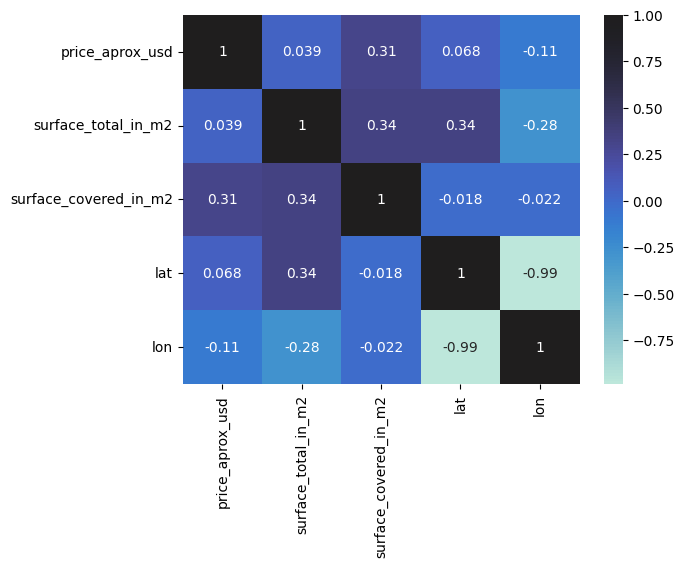

In [25]:
cor = df.corr()
sns.heatmap(cor,annot=True,linecolor='white',center=True)

As everyone see the correlation coefficient between "surface_covered_in_m2" and "surface_total_in_m2" is pretty high we only need one of them so I will drop "surface_total_in_m2



In [26]:
df.drop(columns = ["surface_total_in_m2"], inplace = True)



> **4-Data split**



In [27]:
target = "price_aprox_usd"
X = df.drop(columns = [target])
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1101, 4)
y shape: (1101,)


In [28]:
#split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,  random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (880, 4)
y_train shape: (880,)
X_test shape: (221, 4)
y_test shape: (221,)




> **5-Build Model**




# **5.1.1-Baseline**

In [36]:
y_mean = y_train.mean()
print("Mean apt price:",round(y_mean,2))

print("___"*20)

y_pred_baseline = [y_mean]*len(y_train)
mae_baseline = mean_absolute_error(y_pred_baseline, y_train)
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price: 54421.72
____________________________________________________________
Baseline MAE: 17146.18


The mean apartment price and baseline MAE should be similar but not identical 

# **5.1.2-Iterate**

# **`Linear Regression`**

In [57]:
#Create a pipeline named model that contains all the required transformers and fit the model
model=make_pipeline(OneHotEncoder(),
                    SimpleImputer(),
                    LinearRegression())
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['borough'])),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [59]:
y_pred = model.predict(X_val)
print("Training MAE:", mean_absolute_error(y_val, y_pred))

Training MAE: 15650.600935173688




> **6-Evaluate**



In [60]:
X_test = pd.read_csv("/content/drive/MyDrive/mexico house/mexico-city-test-features.csv")
X_test.head()

,Unnamed: 0,surface_covered_in_m2,lat,lon,borough
0,1,60,19.493185,-99.205755,Azcapotzalco
1,2,55,19.307247,-99.166700,Coyoacán
2,3,50,19.363469,-99.010141,Iztapalapa
3,4,60,19.474655,-99.189277,Azcapotzalco
4,5,74,19.394628,-99.143842,Benito Juárez


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1041 non-null   int64  
 1   surface_covered_in_m2  1041 non-null   int64  
 2   lat                    986 non-null    float64
 3   lon                    986 non-null    float64
 4   borough                1041 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 40.8+ KB


In [65]:
intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:7])  # First five coefficients

coefficients len: 17
[   337.66105386 -25985.07377873 -34275.67725304   4952.8141056
  13434.81381221   3615.74302661  -3327.48814411]


In [64]:
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:7])  # First five feature names

features len: 17
['surface_covered_in_m2', 'lat', 'lon', 'borough_1', 'borough_2', 'borough_3', 'borough_4']


In [66]:
feat_imp = pd.Series(coefficients, index = feature_names)
feat_imp.head()

surface_covered_in_m2      337.661054
lat                     -25985.073779
lon                     -34275.677253
borough_1                 4952.814106
borough_2                13434.813812
dtype: float64

Text(0.5, 1.0, 'Feature Importance for Apartment Price')

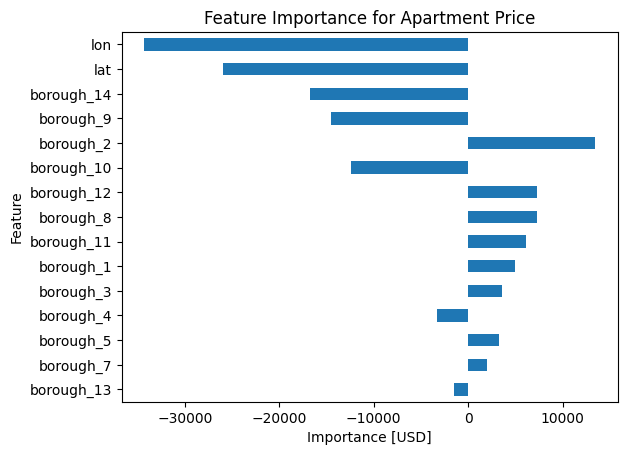

In [67]:
#feature importance 
feat_imp.sort_values(key=abs).tail(15).plot(kind = "barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importance for Apartment Price")

# **`Ridge`**

In [68]:
model_ridge = make_pipeline(OneHotEncoder(), SimpleImputer(), Ridge())
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['borough'])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [69]:
y_pred = model_ridge.predict(X_val)
print("Training MAE:", mean_absolute_error(y_val, y_pred))

Training MAE: 15712.621701521428


In [71]:
coefficients = model_ridge.named_steps["ridge"].coef_
features = model_ridge.named_steps["onehotencoder"].get_feature_names_out()
feat_imp = pd.Series(coefficients, index = features)
feat_imp

surface_covered_in_m2      345.829925
lat                      -6954.319296
lon                     -10585.223783
borough_1                 3206.454118
borough_2                13269.653039
borough_3                 4954.898879
borough_4                -5182.775767
borough_5                 3484.798652
borough_6                 -483.423916
borough_7                 1537.108371
borough_8                 9025.360476
borough_9               -14815.164985
borough_10              -13412.623539
borough_11                4871.091603
borough_12                7399.403262
borough_13               -3883.261537
borough_14               -9971.518655
dtype: float64

In [72]:
feat_imp = pd.Series(coefficients, index = feature_names)
feat_imp.head()
     

surface_covered_in_m2      345.829925
lat                      -6954.319296
lon                     -10585.223783
borough_1                 3206.454118
borough_2                13269.653039
dtype: float64

Text(0.5, 1.0, 'Feature Importance for Apartment Price')

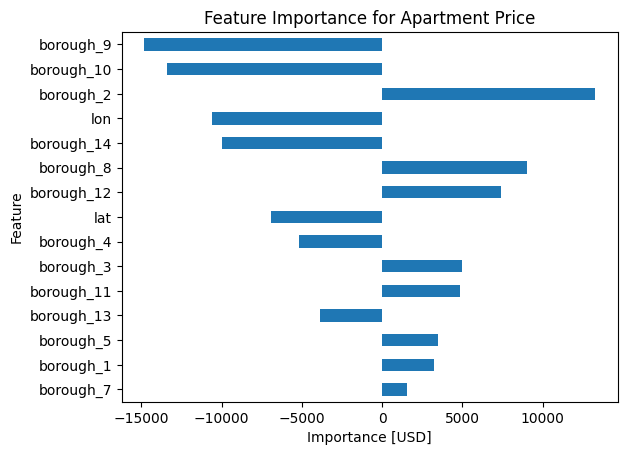

In [73]:
feat_imp.sort_values(key=abs).tail(15).plot(kind = "barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importance for Apartment Price")

In [76]:
#Create a function predict_price that takes four arguments (area, lat, lon, and neighborhood) and returns your model's prediction for an apartment price
def predict_price(area, lat, lon, borough):
    data = {
        "surface_covered_in_m2": area,
        "lat": lat,
        "lon": lon,
        "borough": borough
    }
    df = pd.DataFrame(data, index = [0])
    
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [77]:
predict_price(100, 18, -100, "Azcapotzalco")

'Predicted apartment price: $134709.28'

In [78]:
interact(
    predict_price,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    borough=Dropdown(options=sorted(X_train["borough"].unique())),
);

interactive(children=(IntSlider(value=66, description='area', max=91, min=48), FloatSlider(value=19.4605381111…